In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X, y = load('../../preprocessing/clustering_data.joblib')


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142913 entries, 0 to 142912
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 142913 non-null  float64
 1   year                               142913 non-null  float64
 2   loan_amount                        142913 non-null  float64
 3   rate_of_interest                   142913 non-null  float64
 4   Interest_rate_spread               142913 non-null  float64
 5   Upfront_charges                    142913 non-null  float64
 6   property_value                     142913 non-null  float64
 7   income                             142913 non-null  float64
 8   Credit_Score                       142913 non-null  float64
 9   LTV                                142913 non-null  float64
 10  dtir1                              142913 non-null  float64
 11  loan_limit_ncf                     1429

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 1.30559265,  0.01747196],
       [ 1.40498072,  0.14590195],
       [-0.05371203, -0.00827822],
       ...,
       [-1.79578626,  0.03744576],
       [ 0.5978148 , -0.15281623],
       [ 0.73183021, -0.25282961]])

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
def visualize_clustering(centers, labels, features, alg_name):
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")
    plt.scatter(features[0], features[1], c = labels)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('{} {} clusters'.format(alg_name, len(centers)))
    plt.show()

In [7]:
from sklearn. cluster import BisectingKMeans

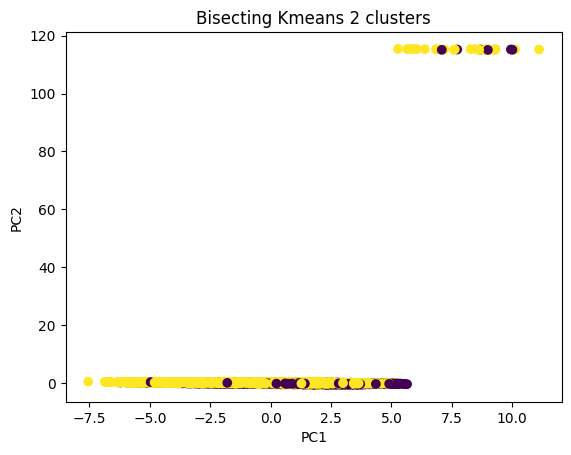

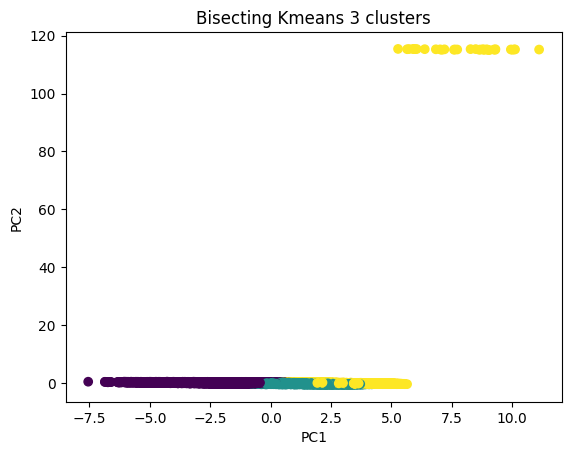

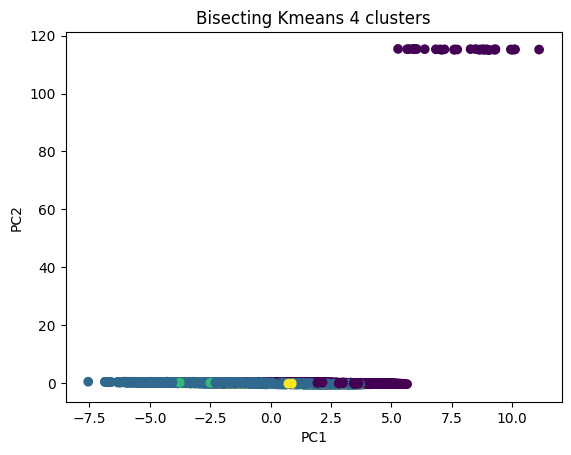

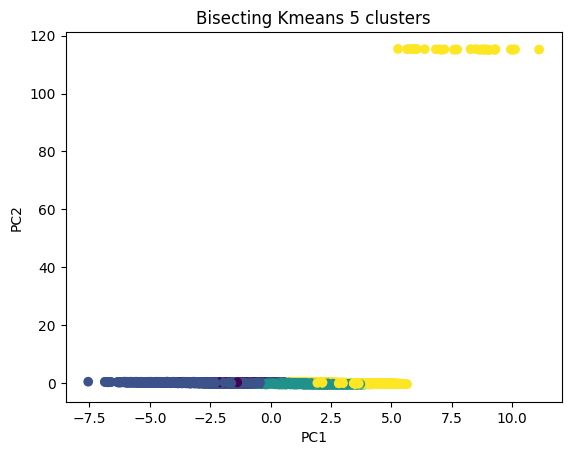

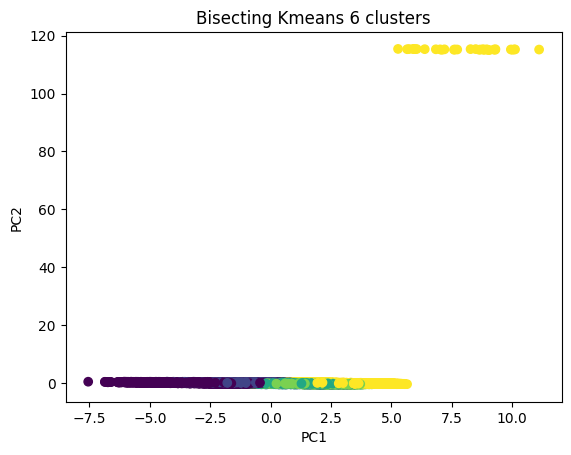

In [8]:
kmeans_cluster_centers = []
sse = []
silhouettes = []
for i in range (2, 7):
    bkmeans = BisectingKMeans(n_clusters=i,bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Bisecting Kmeans")
    kmeans_cluster_centers.append(bkmeans.cluster_centers_)
    sse.append(bkmeans.inertia_)
    silhouettes.append(silhouette_score(X, bkmeans.labels_))

In [9]:
sse

[10272126.741047185,
 9991541.135948116,
 9884621.431387413,
 9741191.798005164,
 9634396.128187668]

In [10]:
silhouettes

[0.2060236677421675,
 0.05769061637663976,
 0.07613151908278692,
 0.05037198017145684,
 0.019577822778775105]

Text(0, 0.5, 'SSE')

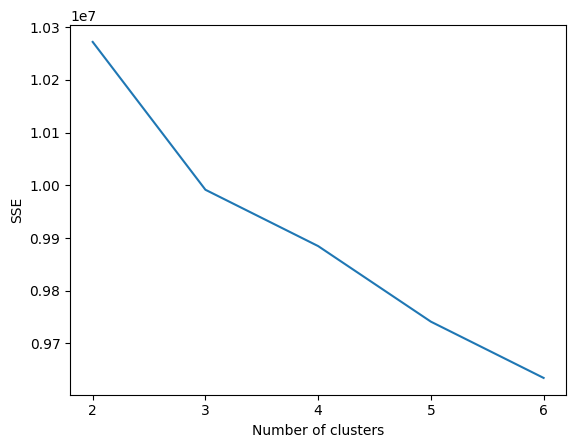

In [11]:
plt.plot(range(2, 7), sse)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

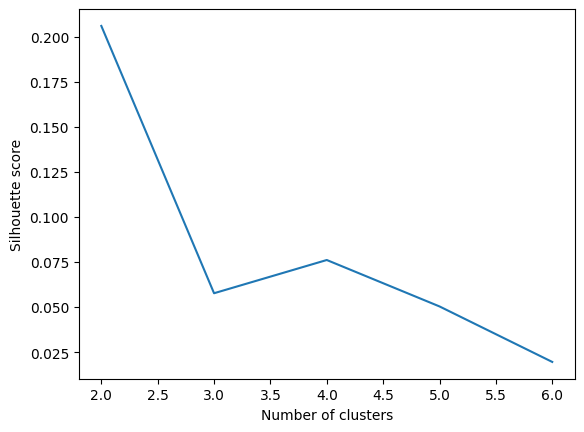

In [12]:
plt.plot(range(2, 7), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [13]:
sse2 = []
silhouettes2 = []

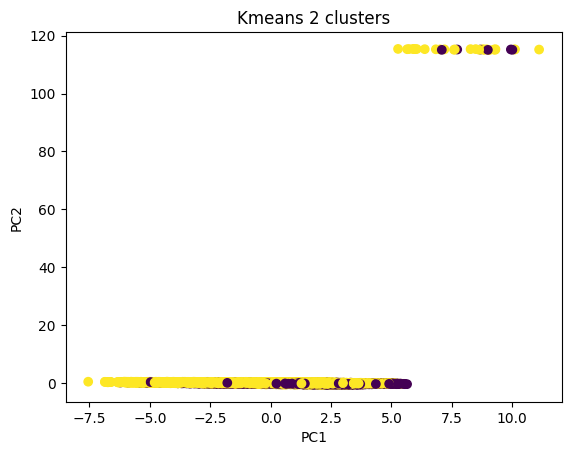

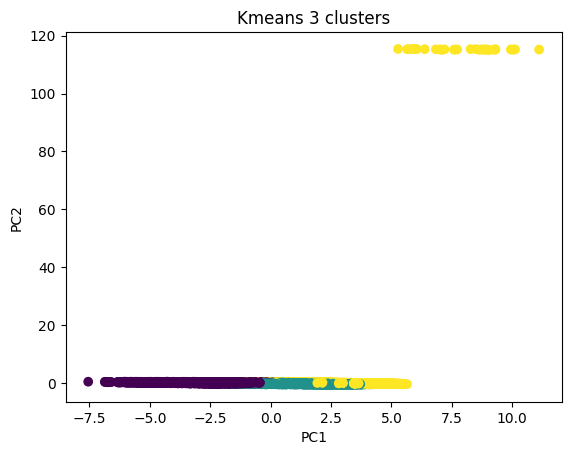

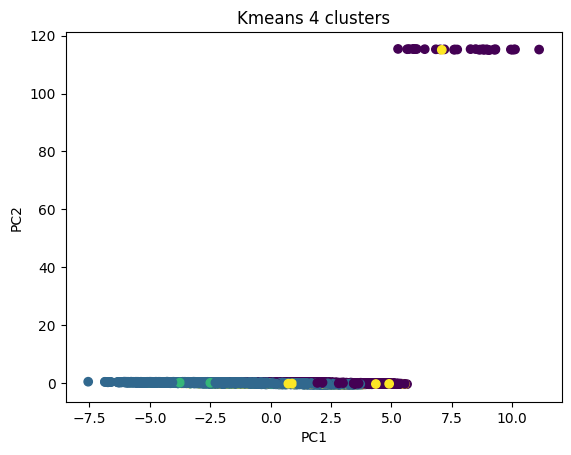

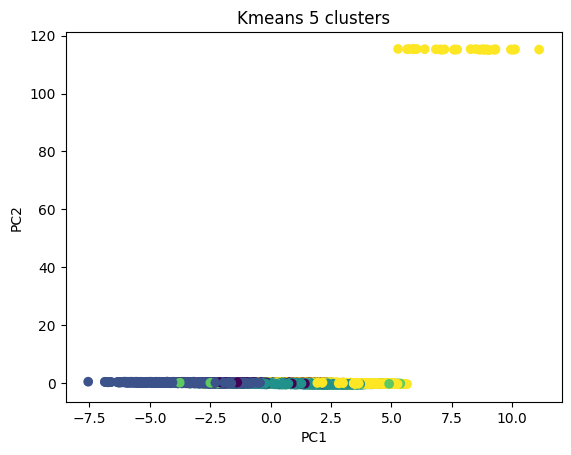

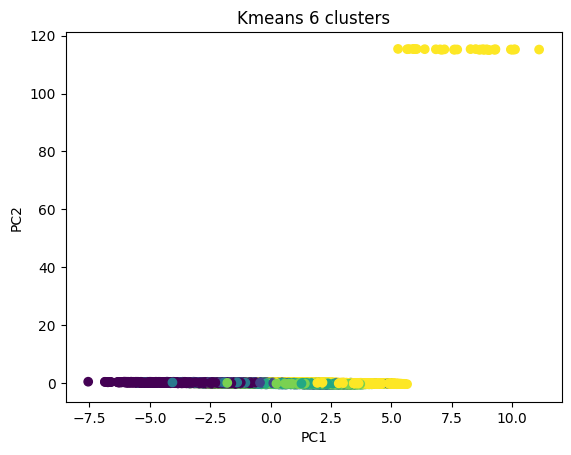

In [14]:
for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, init=kmeans_cluster_centers[i - 2], n_init=1)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse2.append(kmeans.inertia_)
    silhouettes2.append(silhouette_score(X, kmeans.labels_))

In [15]:
sse2

[10272126.741047183,
 9950757.890668662,
 9876798.531827139,
 9629333.302679006,
 9477423.495174067]

In [16]:
silhouettes2

[0.2060236677421675,
 0.05267101535606973,
 0.07553769393351899,
 0.05629034240626151,
 0.024152594493017217]

Text(0, 0.5, 'SSE')

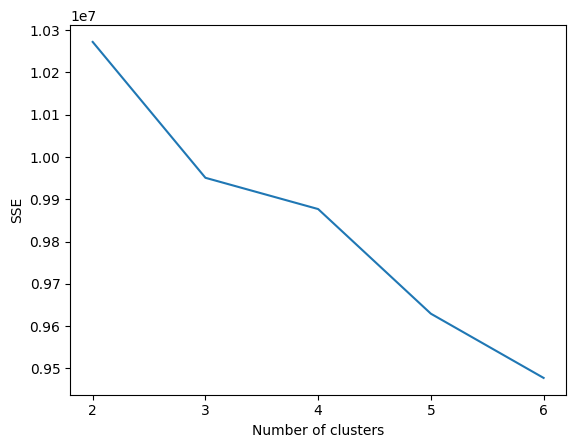

In [17]:
plt.plot(range(2, 7), sse2)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

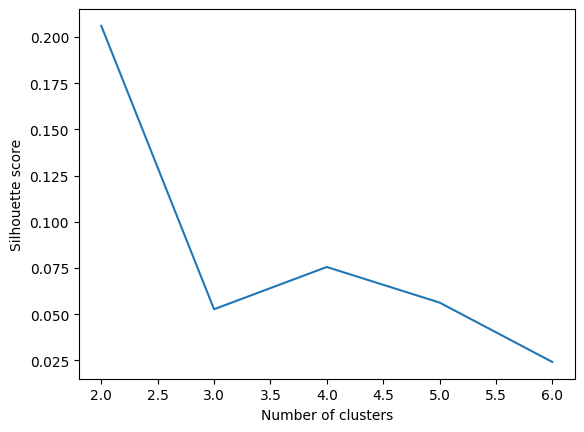

In [18]:
plt.plot(range(2, 7), silhouettes2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [19]:
X1 = X['rate_of_interest']
X2 = X['Interest_rate_spread']
X3 = X['Upfront_charges']
X4 = X['LTV']
X = pd.DataFrame(data=X1, columns=['rate_of_interest'])
X.insert(value=X2, column='Interest_rate_spread', loc=1)
X.insert(value=X3, column='Upfront_charges',loc=2)
X.insert(value=X4, column='LTV', loc=3)

In [20]:
X.head()

,rate_of_interest,Interest_rate_spread,Upfront_charges,LTV
0,-1.064183,-1.221324,-0.378275,1.346983
1,-0.340560,-0.612590,-0.781588,0.666780
2,1.144313,-0.279387,-0.822068,0.306245
3,0.605938,0.628148,-0.178258,-0.285784
4,0.171764,-0.082786,-1.050270,0.966366


In [21]:
X_pca = pca.fit_transform(X)
X_pca

array([[-1.81708075, -0.90374817],
       [-0.84679744, -0.88385599],
       [ 0.46277649, -0.88684691],
       ...,
       [-1.25832883,  0.33355043],
       [-0.07630181,  0.59671624],
       [ 2.09729838,  0.57409941]])

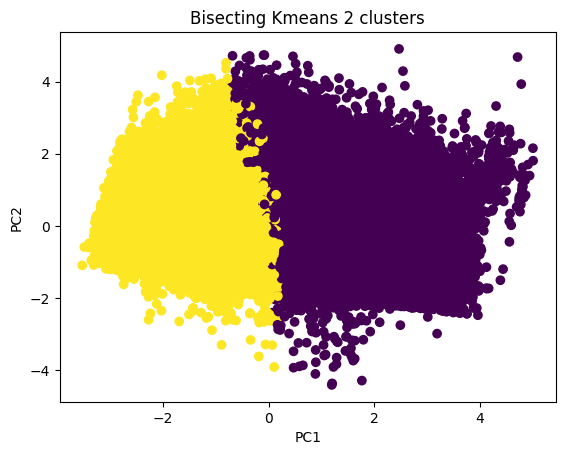

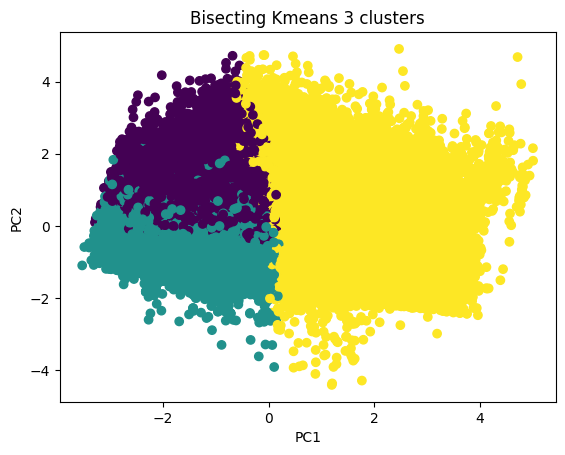

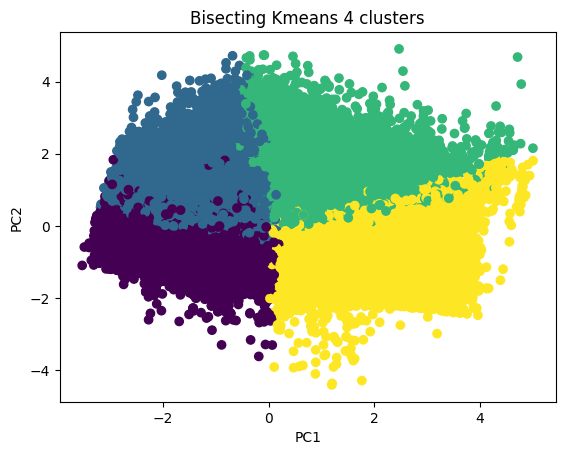

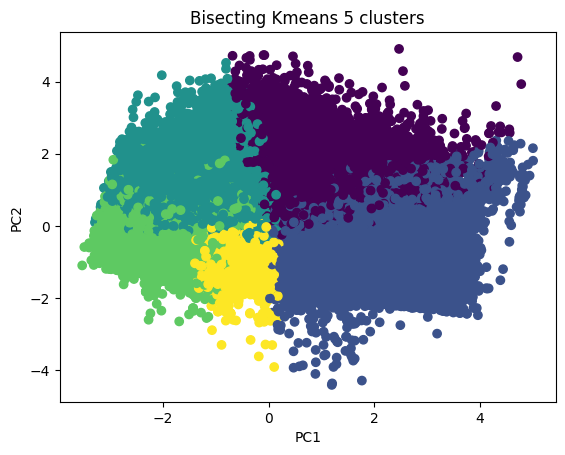

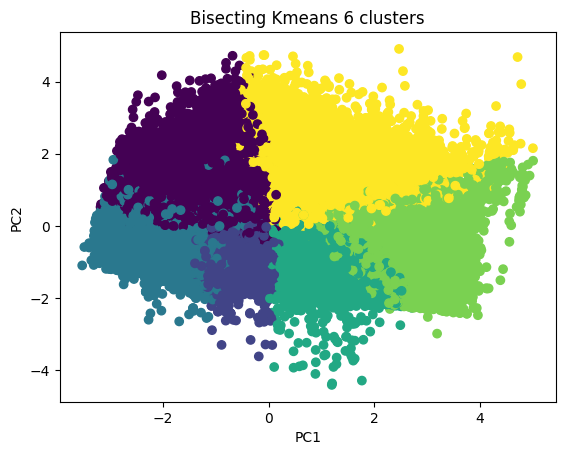

In [22]:
sse5 = []
silhouettes5 = []
kmeans_cluster_centers = []
for i in range (2, 7):
    bkmeans = BisectingKMeans(n_clusters=i,bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Bisecting Kmeans")
    sse5.append(bkmeans.inertia_)
    silhouettes5.append(silhouette_score(X, bkmeans.labels_))
    kmeans_cluster_centers.append(bkmeans.cluster_centers_)

Text(0, 0.5, 'SSE')

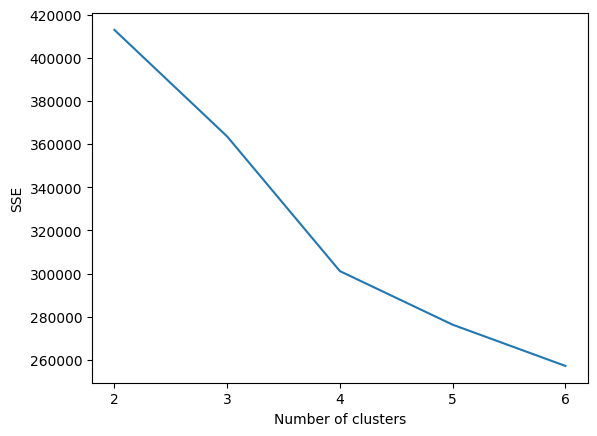

In [23]:
plt.plot(range(2, 7), sse5)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

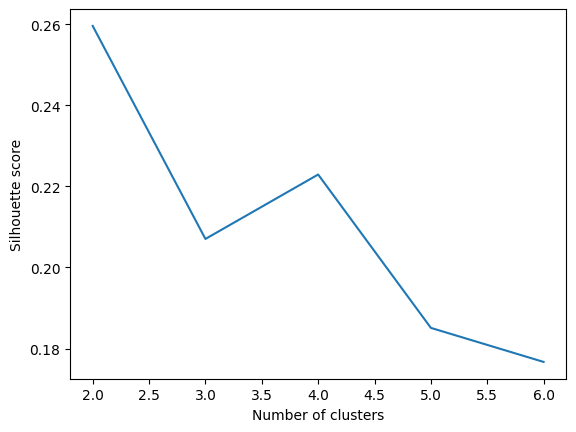

In [24]:
plt.plot(range(2, 7), silhouettes5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [25]:
sse4 = []
silhouettes4 = []

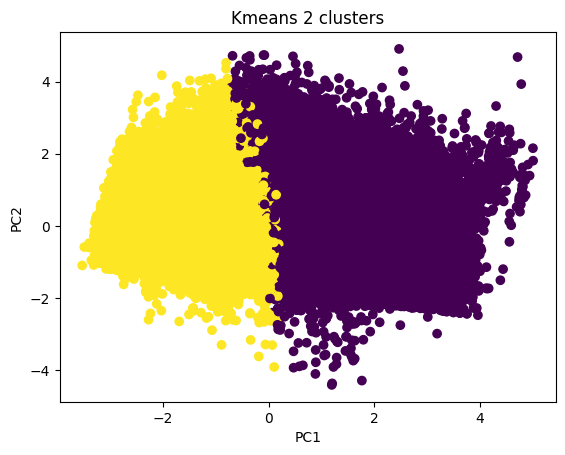

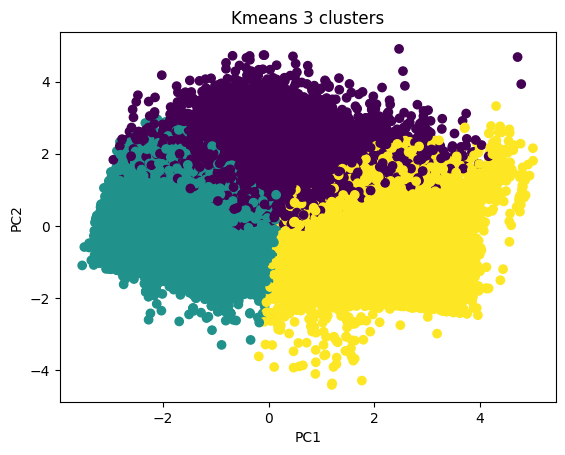

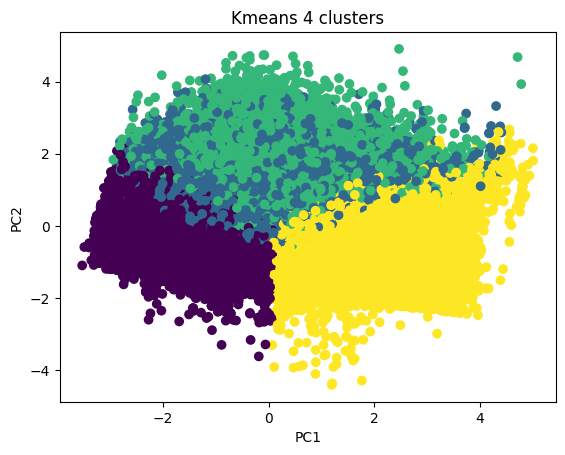

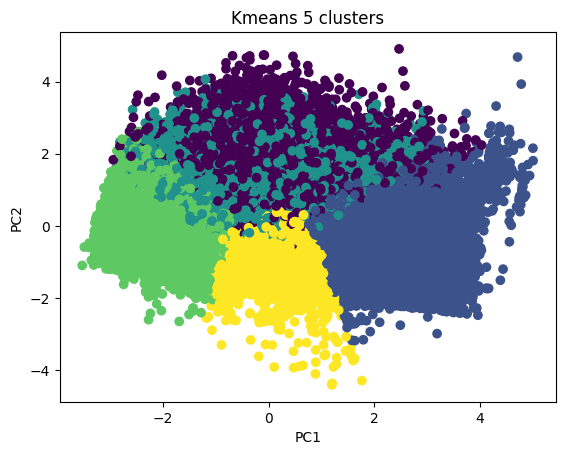

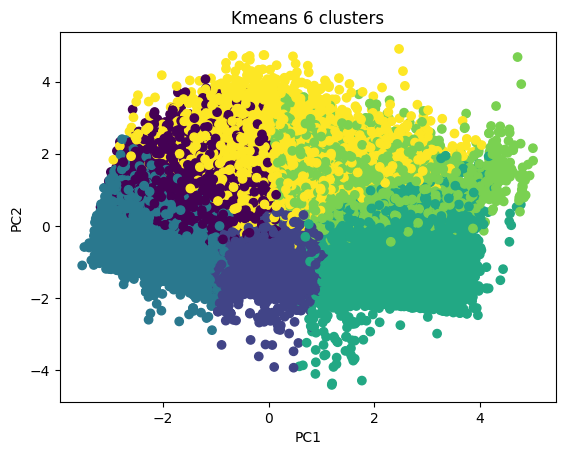

In [26]:
for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, init=kmeans_cluster_centers[i - 2], n_init=1)
    kmeans.fit(X)
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X_pca[:, 0], X_pca[:, 1]], "Kmeans")
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse4.append(kmeans.inertia_)
    silhouettes4.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'SSE')

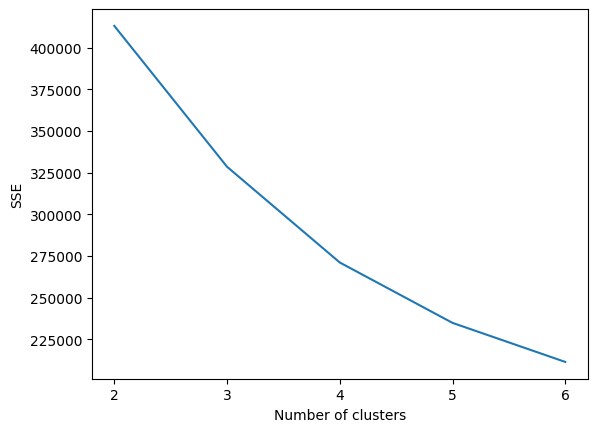

In [27]:
plt.plot(range(2, 7), sse4)
plt.xticks(range(2, 7))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

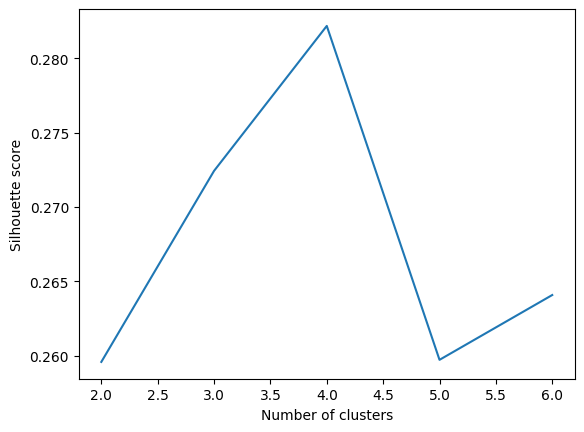

In [28]:
plt.plot(range(2, 7), silhouettes4)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

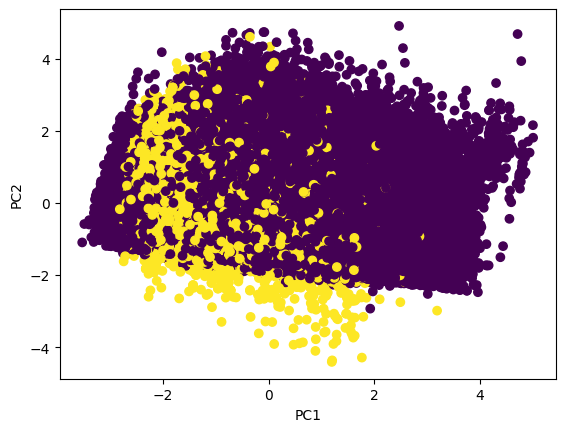

In [29]:
scatter = plt.scatter(X_pca[:,0], X_pca[:,1],c=y, label=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [30]:
def clustering_accuracy(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

/home/stefan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


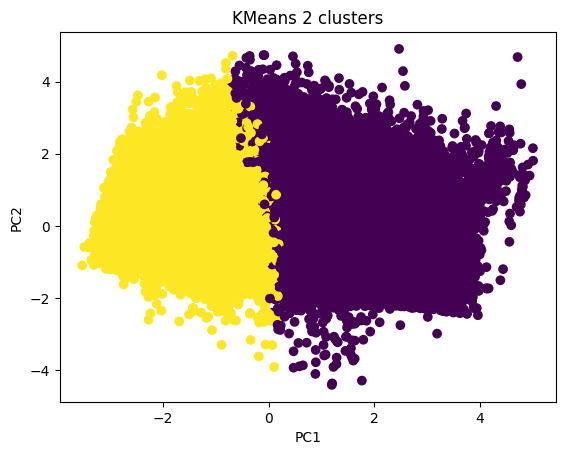

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, [X_pca[:,0], X_pca[:,1]], "KMeans")

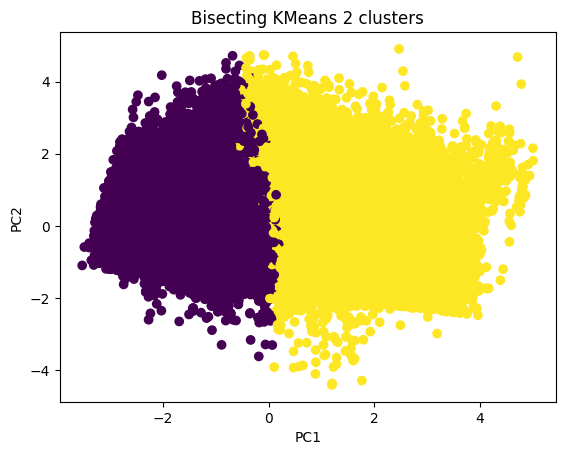

In [32]:
bkmeans = BisectingKMeans(n_clusters=2, bisecting_strategy='largest_cluster', random_state=0)
bkmeans.fit(X)
visualize_clustering(bkmeans.cluster_centers_, bkmeans.labels_, [X_pca[:,0], X_pca[:,1]], "Bisecting KMeans")

In [33]:
clustering_accuracy(y, kmeans.labels_)

65.35374668504615

In [34]:
clustering_accuracy(y, bkmeans.labels_)

35.1934393652082